In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('D:/COURSES/Python for Machine Learning & Data Science Masterclass/1 - Introduction to Course/DATA/penguins_size.csv')

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df=df.dropna()

In [5]:
df[df['culmen_depth_mm'].isnull() | df['culmen_length_mm'].isnull() | df['flipper_length_mm'].isnull()
  | df['body_mass_g'].isnull() | df['sex'].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


In [6]:
X=pd.get_dummies(data=df.drop('species',axis=1),drop_first=True)

In [7]:
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,0,1
1,39.5,17.4,186.0,3800.0,0,1,1,0
2,40.3,18.0,195.0,3250.0,0,1,1,0
4,36.7,19.3,193.0,3450.0,0,1,1,0
5,39.3,20.6,190.0,3650.0,0,1,0,1
...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,1,0
340,46.8,14.3,215.0,4850.0,0,0,1,0
341,50.4,15.7,222.0,5750.0,0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,1,0


In [8]:
y=df['species']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  For a comparison between tree-based ensemble models see the example
 |  :ref:`sp

In [15]:
rfc=RandomForestClassifier(n_estimators=10,random_state=101,max_features='sqrt')

In [16]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [18]:
pred=rfc.predict(X_test)

In [78]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score

In [20]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

      Adelie       0.95      0.97      0.96        40
   Chinstrap       0.96      0.92      0.94        24
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101



In [21]:
cm=confusion_matrix(pred,y_test)

In [22]:
cm

array([[39,  1,  0],
       [ 2, 22,  0],
       [ 0,  0, 37]], dtype=int64)

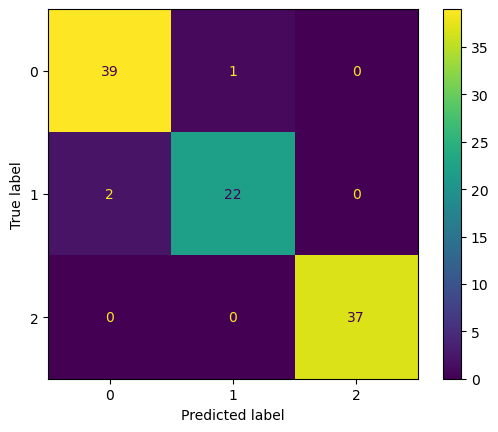

In [24]:
ConfusionMatrixDisplay(cm).plot()

In [25]:
df = pd.read_csv('D:/COURSES/Python for Machine Learning & Data Science Masterclass/1 - Introduction to Course/DATA/data_banknote_authentication.csv')

In [26]:
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [30]:
df['Class'].unique()

array([0, 1], dtype=int64)

In [31]:
#no need to scale the data in tree based methods as they work on features independently

In [56]:
n_estimators=[64,100,128,200]

In [57]:
max_features=[2,3,4]

In [58]:
bootstrap=[True,False]

In [59]:
oob_score=[True,False]

In [60]:
param_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'bootstrap':bootstrap,
    'oob_score':oob_score
}

In [61]:
rfc=RandomForestClassifier()

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
grid_model=GridSearchCV(rfc,param_grid=param_grid)

In [69]:
X=df.drop('Class',axis=1)
y=df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [70]:
grid_model.fit(X_train,y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 417, in fit
    raise ValueError("Out of bag

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [71]:
preds=grid_model.predict(X_test)

In [72]:
preds


array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

In [73]:
grid_model.best_params_

{'bootstrap': True, 'max_features': 3, 'n_estimators': 64, 'oob_score': True}

In [74]:
grid_model.best_estimator_

RandomForestClassifier(max_features=3, n_estimators=64, oob_score=True)

In [75]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       123
           1       1.00      0.99      0.99        83

    accuracy                           1.00       206
   macro avg       1.00      0.99      0.99       206
weighted avg       1.00      1.00      1.00       206



In [76]:
cm=confusion_matrix(preds,y_test)

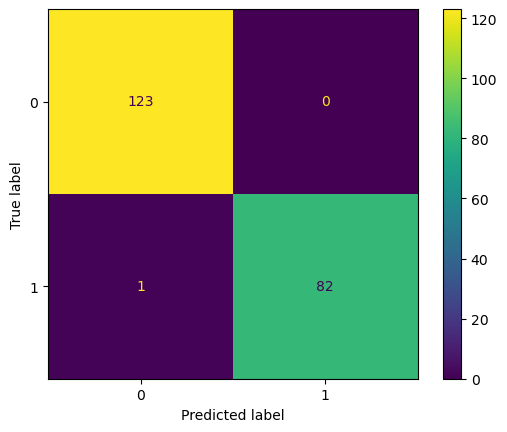

In [77]:
ConfusionMatrixDisplay(cm).plot()

In [80]:
errors=[]
misclassifications=[]
for i in range(1,200):
    rfc=RandomForestClassifier(n_estimators=i,max_features=3)
    rfc.fit(X_train,y_train)
    prediction=rfc.predict(X_test)
    errors.append(1-accuracy_score(y_test,prediction))
    misclassifications.append(np.sum(prediction!=y_test))

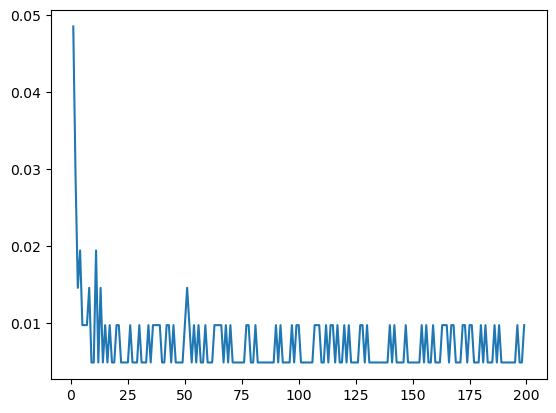

In [81]:
plt.plot(range(1,200),errors)

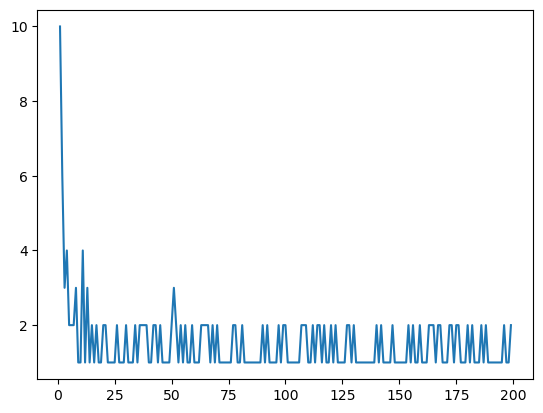

In [82]:
plt.plot(range(1,200),misclassificationsassificationslassificationsclassifications)